In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import tree

In [2]:
df=pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [8]:
df.head(3)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856


# Seperating data

In [9]:
y=df['Weight']
y.head(5)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [10]:
X= df.copy()
X=df.drop('Weight', axis=1)
X.head(5)

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)


# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
le_r =  LinearRegression()
le_r.fit(X,y)

LinearRegression()

In [13]:
m= le_r.coef_
m

array([19.5062689 ,  5.97547256])

In [14]:
y_pred = le_r.predict(X_test)
y_pred

array([142.50069611, 186.14621633, 198.55728528, ..., 102.86520678,
       190.94708177, 143.40278697])

In [15]:
le_r.score(X_test , y_test)

0.9059597450155089

In [16]:
le_r.score(X_train , y_train)

0.8973707281841031

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

96.7874249138527

# K-nearest neighbors (KNN) Regression

In [18]:

from sklearn.neighbors import KNeighborsRegressor

In [21]:

knr = KNeighborsRegressor(n_neighbors=50)
knr.fit(X,y)

KNeighborsRegressor(n_neighbors=50)

In [22]:
y_pred = knr.predict(X_test)
y_pred

array([145.65438651, 185.84030708, 196.22194359, ..., 103.28380852,
       192.51081579, 140.93241511])

In [23]:
knr.score(X_test , y_test)

0.9070412498498746

In [24]:
knr.score(X_train , y_train)

0.8982649115486903

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9070412498498746

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

95.67432640122752

# K-nearest neighbors (KNN) Regression with Optimization and Tunning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

model_rs = KNeighborsRegressor(n_neighbors=2)
k_range=list(range(5, 100))
options=['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=options)

rand_search = RandomizedSearchCV(model_rs,
                           param_grid)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']})

In [28]:
rand_search.best_score_

0.8931082445552176

In [29]:
rand_search.best_estimator_

KNeighborsRegressor(n_neighbors=54)

In [30]:

rand_search.best_params_

{'weights': 'uniform', 'n_neighbors': 54}

In [31]:
rand_search_new = rand_search.best_estimator_

In [32]:
rand_search_new.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=54)

In [33]:
y_pred = rand_search_new.predict(X_test)
y_pred

array([143.33692413, 185.54611139, 196.43654041, ..., 103.87821896,
       192.79018751, 143.15339722])

In [34]:
rand_search_new.score(X_test , y_test)

0.9035106657160903

In [35]:
rand_search_new.score(X_train , y_train)

0.8980454561346588

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9035106657160903

In [37]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

99.30804843661585

# Model Compare among Linear Regression, KNN Regression and KNN Regression Optimized with RandomizedSearchCV

In [39]:
lr = 'Accuracy of KNN Class'
knn_r = 'Accuracy of KNN'
knn_rs = 'Accuracy of KNN class using RandomizedSearchCV'
df1=pd.DataFrame([[lr,0.9059597450155089],[knn_r, 0.9494475565847128], [knn_rs, 0.9035773160846217]],
                 columns=['Accuracy', 'Value'])
df1

,Accuracy,Value
0,Accuracy of KNN Class,0.905960
1,Accuracy of KNN,0.949448
2,Accuracy of KNN class using RandomizedSearchCV,0.903577


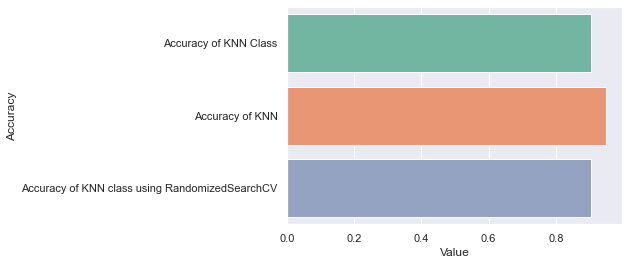

In [40]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df1, palette="Set2")
sns.set(rc={'figure.figsize':(10,5)})

# KNN Classification Algorithm

In [41]:
df3=pd.read_csv('weight-height.csv')

In [43]:
df3.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [48]:
Y=df['Gender']
Y
X=df.copy()
X=df.drop('Gender', axis=1)
X.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.70, random_state=42)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=2)

In [51]:
knn_cl.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
Y_pred= knn_cl.predict(X_test)

# Confusion Matrix

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[ 981,   85],
       [ 232, 1269]], dtype=int64)

Text(66.5, 0.5, 'Actual Values')

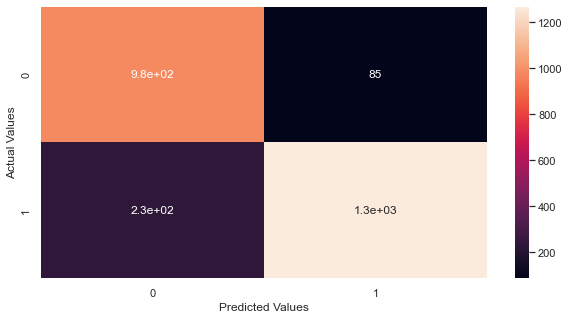

In [56]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [58]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred)
accuracy

0.876509544215037

In [59]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

array([0.86090391, 0.88896673])

# ROC and AUC Graph

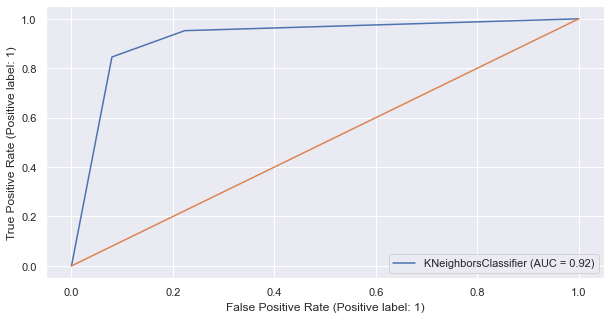

In [60]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl,X_test, Y_test)
plt.plot([0,1],[0,1])

# Classification Report Summary

In [61]:
from sklearn.metrics import classification_report
class_r=classification_report(Y_test, Y_pred)
print(class_r)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1066
           1       0.94      0.85      0.89      1501

    accuracy                           0.88      2567
   macro avg       0.87      0.88      0.87      2567
weighted avg       0.88      0.88      0.88      2567



# K value

In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
k_range=range(1,26)
scores=[]

for k in k_range:
    knn_cl=KNeighborsClassifier(n_neighbors=k)
    knn_cl.fit(X_train, Y_train)
    Y_pred=knn_cl.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred))

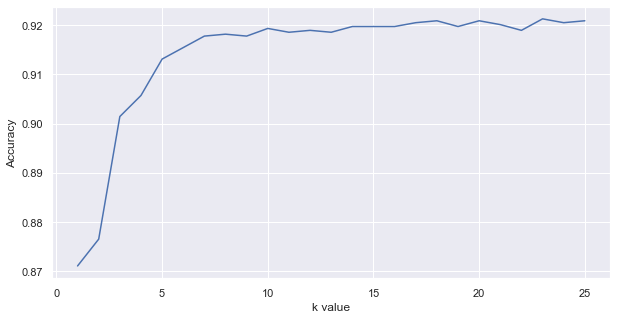

In [64]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

# K-nearest neighbors (KNN) Classifier with Optimization and Tunning

In [65]:

from sklearn.model_selection import RandomizedSearchCV
k_range=list(range(5, 100, 20))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)

In [66]:
record=KNeighborsClassifier()
rand = RandomizedSearchCV(record, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X, Y)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [67]:

rand.best_score_

0.9174755424386511

In [68]:
rand.best_params_

{'weights': 'distance', 'n_neighbors': 92}

In [69]:
rand.best_estimator_

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [70]:

new_rand = rand.best_estimator_

In [71]:

new_rand.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [72]:
Y_pred_rs= new_rand.predict(X_test)

In [73]:

new_rand.score(X_test, Y_test)

0.9185820023373588

#  Confusion Matrix

In [74]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rs=confusion_matrix(Y_test, Y_pred_rs)

Text(66.5, 0.5, 'Actual Values')

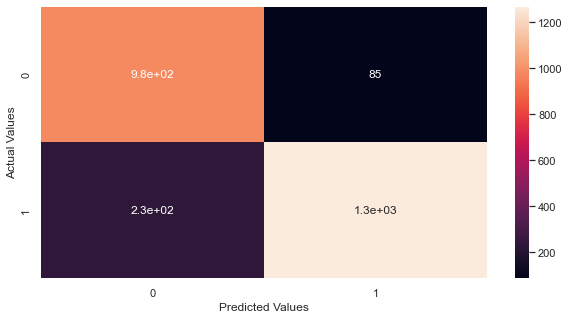

In [75]:

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Accuracy

In [77]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred_rs)
accuracy

0.9185820023373588

# Harmonic Mean or F1 Score

In [78]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred_rs, average=None)

array([0.90127539, 0.93072589])

# ROC and AUC Graph

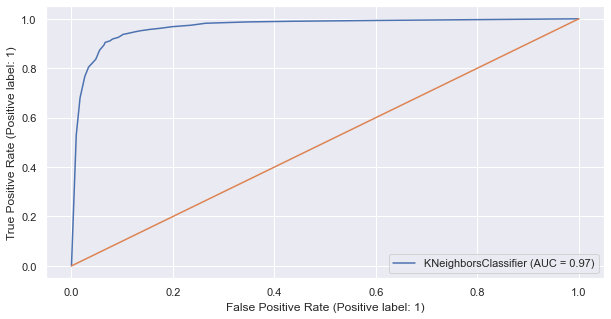

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl, X_test, Y_test)
plt.plot([0,1],[0,1])

# Classification Report Summary

In [80]:
from sklearn.metrics import classification_report
class_rs=classification_report(Y_test, Y_pred_rs)
print(class_rs)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



# Compare Accuracy KNN and KNN with RandomizedSearchCV optimizer

In [81]:
d = 'Accuracy of KNN Class'
r_rs = 'Accuracy of KNN class using RandomizedSearchCV'

df2=pd.DataFrame([[d,0.876509544215037],[r_rs, 0.9209193611219322]],
                 columns=['Accuracy', 'Value'])
df2

,Accuracy,Value
0,Accuracy of KNN Class,0.876510
1,Accuracy of KNN class using RandomizedSearchCV,0.920919


<AxesSubplot:xlabel='Value', ylabel='Accuracy'>

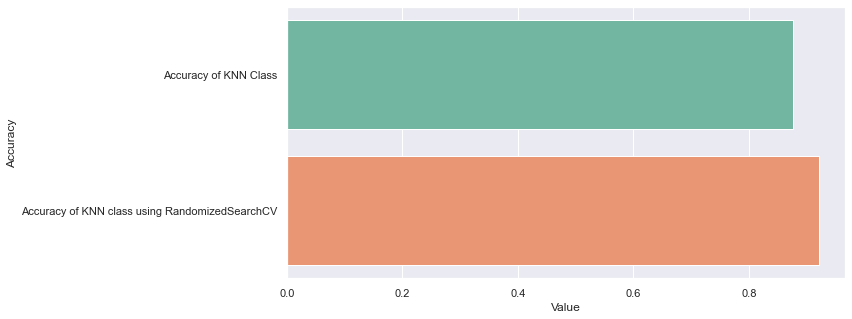

In [82]:
sns.barplot(x="Value", y="Accuracy",  data=df2, palette="Set2")